<h2><center>Applied Machine Learning - Assignment 9</center></h2>
<h4><center>Lorenzo Cirac Monteagduo</center></h4>

In [1]:
import pandas as pd

<h3>Datasets:</h3>
<ol>
    <li>Sparse dataset in libsvm format:
        <ul>
            <li>a9a D1</li>
        </ul>
    </li>
    <li>UCI dataset:
        <ul>
            <li>SMS Spam D2</li>
            <li>Spambase D3</li>
        </ul>
    </li>
</ol>

<h3>Question 1 - A Spam Filter Using SVM</h3>
<h4>Part A:</h4>
<p>Build a spam filter using a pre-processed dataset. A spam filter classifies an email as Ham of Spam, using the content of an email as features. Use dataset D3 for this task. Build a basic spam filter using SVM. Use libsvm, which accepts data in a specfic format: </p>
<p>&lt;label&gt; &lt;index1&gt;:&lt;value1&gt; &lt;index2&gt;:&lt;value2&gt; ...</p>
<p>Convert dataset D3 into the libsvm format. Follow the README document provided at the libsvm link for guidance. Train the spam classifier on the training part of the dataset and evaluate it on the test dataset. Additionally, optimize the hyperparameter C.</p>
<p><strong>Hint</strong>: Choose a diverse range for the hyperparameter, e.g., C = {0.1, 1, 10, 100}, rather than a narrow range (C = {1, 2, 3, 4}). Present results in form of graphs and tables with detailed explanations. Choose a suitable quality criterion (e.g., classification accuracy)</p>
<p><strong>Note</strong>: If you are unable to use libsvm, you may use scikit-learn. However, you still need to convert the data to the libsvm format.</p>

<h4>Part A - Solution:</h4>

In [2]:
D3 = pd.read_csv('res/spambase.data', header = None)
D3

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


<h4>Data Preparation for libsvm</h4>

<p>LIBSVM uses a specific data format structured as &lt;label&gt; &lt;index1&gt;:&lt;value1&gt; &lt;index2&gt;:&lt;value2&gt; ... . The first value in each row is the class label, which is either 0 or 1 in this case. Following the label are the features, each represented by a pair of values. The first value in the pair is the feature index, which specifies the feature's position, and the second value is the actual value of that feature.

Feature indices start at 1 (there is no index 0) and must be listed in ascending order. If a feature index is missing from a row, it is assumed to have a value of 0. This format is advantageous when working with sparse data, as it stores only the non-zero feature values. By excluding unnecessary zeros, this format reduces file size and makes the data easier to interpret.</p>
<p>(https://github.com/cjlin1/libsvm/blob/master/python/README & https://stackoverflow.com/questions/44965186/how-to-understand-the-format-type-of-libsvm-of-spark-mllib)</p> 
<p>Due to various errors encountered while attempting to install libsvm on my computer, I will implement the data transformation method as specified in the task. However, this transformation is not required for my solution using scikit-learn. Therefore, the method I implement will generate a long string instead of outputting a file. This string can be easily converted into the required data file format if necessary.</p>

In [3]:
def transform_dataframe_to_libsvm_format(df):
    libsvm_lines = []
    
    for _, row in df.iterrows():
        label = row.iloc[-1] 
        features = row.iloc[:-1]  
        
        libsvm_features = [
            f'{i + 1}:{value}' for i, value in enumerate(features) if value != 0
        ]
        libsvm_line = f'{int(label)} ' + ' '.join(libsvm_features)
        libsvm_lines.append(libsvm_line)
        
    return '\n'.join(libsvm_lines)

In [4]:
transformed_data_for_libsvm = transform_dataframe_to_libsvm_format(D3)

# This is what the data would look like:
print(transformed_data_for_libsvm[:505] + ' ...')

1 2:0.64 3:0.64 5:0.32 12:0.64 16:0.32 18:1.29 19:1.93 21:0.96 52:0.778 55:3.756 56:61.0 57:278.0
1 1:0.21 2:0.28 3:0.5 5:0.14 6:0.28 7:0.21 8:0.07 10:0.94 11:0.21 12:0.79 13:0.65 14:0.21 15:0.14 16:0.14 17:0.07 18:0.28 19:3.47 21:1.59 23:0.43 24:0.43 37:0.07 50:0.132 52:0.372 53:0.18 54:0.048 55:5.114 56:101.0 57:1028.0
1 1:0.06 3:0.71 5:1.23 6:0.19 7:0.19 8:0.12 9:0.64 10:0.25 11:0.38 12:0.45 13:0.12 15:1.75 16:0.06 17:0.06 18:1.03 19:1.36 20:0.32 21:0.51 23:1.16 24:0.06 40:0.06 43:0.12 45:0.06 46: ...


<h4>Training, Testing & Hyperparameter optimization</h4>

<p>As mentioned earlier, I was unable to install libsvm on my machine. Therefore, I will follow the task's instructions and solve it using scikit-learn instead. We use the SVC class, as its implementation is based on libsvm.</p>

In [5]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split

<h4>Training and Testing</h4>

<p>We will use train_test_split from sklearn to divide the dataset into training (80%) and testing (20%) subsets. First, the model is trained on the training data without hyperparameter optimization (using C, representing L2 Regularization) to evaluate its baseline performance on the test set. We measure performance using accuracy_score and classification_report from sklearn. Next, hyperparameter optimization is performed on the training data to identify the best values for training the model. Finally, the optimized model is evaluated on the test set to assess its performance.</p>

In [6]:
X_D3 = D3.iloc[:, :-1]
y_D3 = D3.iloc[:, -1]

In [7]:
X_train_D3, X_test_D3, y_train_D3, y_test_D3 = train_test_split(X_D3, y_D3, test_size = 0.2)

In [8]:
def print_results(datatype, y_true, y_prediction):
    print('=' * 54)
    print(f'Classification Report on {datatype} Dataset:\n {metrics.classification_report(y_true, y_prediction)}')
    print(f'{datatype} Accuracy: {metrics.accuracy_score(y_true, y_prediction)}')
    print('=' * 54)

In [9]:
model = SVC()
model.fit(X_train_D3, y_train_D3)

y_prediction_train_D3 = model.predict(X_train_D3)
y_prediction_test_D3 = model.predict(X_test_D3)

print_results('Train', y_train_D3, y_prediction_train_D3)
print()
print_results('Test', y_test_D3, y_prediction_test_D3)

Classification Report on Train Dataset:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80      2239
           1       0.75      0.44      0.55      1441

    accuracy                           0.72      3680
   macro avg       0.73      0.67      0.68      3680
weighted avg       0.73      0.72      0.70      3680

Train Accuracy: 0.7222826086956522

Classification Report on Test Dataset:
               precision    recall  f1-score   support

           0       0.70      0.89      0.79       549
           1       0.73      0.44      0.55       372

    accuracy                           0.71       921
   macro avg       0.72      0.67      0.67       921
weighted avg       0.72      0.71      0.69       921

Test Accuracy: 0.7100977198697068


<p>
Based on the results, the base model (without additional parameters) does not perform well. Therefore, we will proceed with hyperparameter optimization.</p>

<h4>Hyperparameter Optimization</h4>

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

<p>As specified in the task, we will experiment with a diverse range of values for the parameter C.</p>

In [11]:
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000]}
grid_search = GridSearchCV(SVC(), param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train_D3, y_train_D3)
results = grid_search.cv_results_

print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'C': 10000}


In [12]:
y_prediction_train_D3 = grid_search.predict(X_train_D3)
y_prediction_test_D3 = grid_search.predict(X_test_D3)

print_results('Train', y_train_D3, y_prediction_train_D3)
print()
print_results('Test', y_test_D3, y_prediction_test_D3)

Classification Report on Train Dataset:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      2239
           1       0.93      0.91      0.92      1441

    accuracy                           0.94      3680
   macro avg       0.93      0.93      0.93      3680
weighted avg       0.94      0.94      0.94      3680

Train Accuracy: 0.9364130434782608

Classification Report on Test Dataset:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       549
           1       0.92      0.90      0.91       372

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921

Test Accuracy: 0.9294245385450597


<p>Now that we have selected C=10,000, both accuracy and precision have significantly improved. Let's plot the accuracy for different values of C:</p>

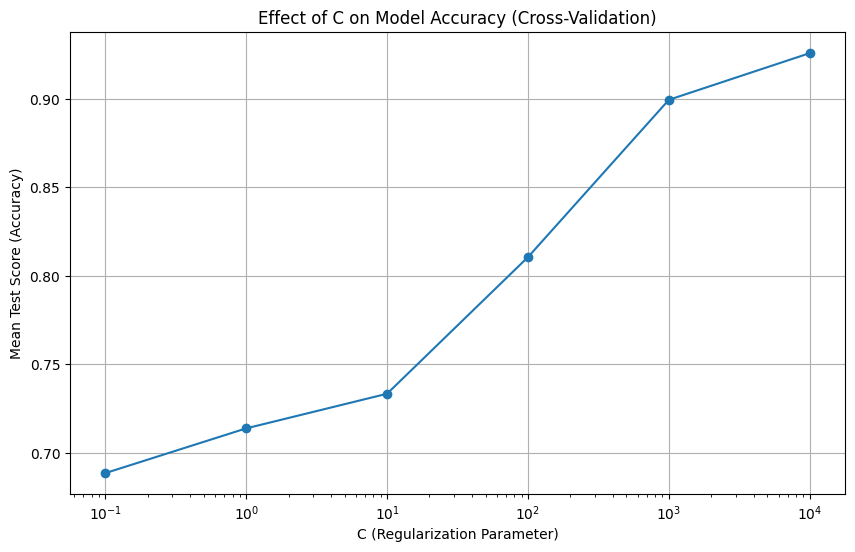

In [13]:
results_df = pd.DataFrame({
    'C': results['param_C'],  
    'Mean Test Score': results['mean_test_score']
})

plt.figure(figsize = (10,6))
plt.plot(results_df['C'], results_df['Mean Test Score'], marker = 'o')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Effect of C on Model Accuracy (Cross-Validation)')
plt.xscale('log')
plt.grid(True)
plt.show()

<p>To better understand the graph, we should have a look at the documentation for the parameter C: <em>"Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared L2 penalty."</em> (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)</p>
<p>As C increases, the model places greater emphasis on minimizing training errors, reducing the regularization strength and allowing more complex decision boundaries. This improves accuracy on the training set and potentially the validation set when the model is under-regularized. However, overly large C values may lead to overfitting, capturing noise in the data and reducing generalization performance.</p>

<h4>Part B:</h4>
<p>Pre-process dataset D2, which consists of labels (Ham or Spam) and SMS text content. Transform the text data into features using methods like TFIDF or Count Vectorization from
scikit-learn. Avoid using OneHotEncoding, as it may not be suitable. Remove stop words
(e.g., “this,” “the,” “is,” etc.) for better results.
After preprocessing, use scikit-learn’s SVM implementation to train and evaluate the
model. Experiment with different hyperparameters and kernels (linear and RBF). Perform 5-fold
cross-validation and present results as plots and tables. You may use sklearn.pipeline.Pipeline
to streamline the workflow.</p>

<h4>Part B - Solution</h4>

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

<p>Since the data is formatted with the type (ham or spam) followed by the message, we will use pandas to read the data into a DataFrame, storing the type and the message in separate columns.</p>

In [15]:
D2 = pd.read_csv('res/SMSSpamCollection', sep = '\t', header = None, names = ['type', 'message'])
D2

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<p>Next, we will convert the values in the "type" column (ham and spam) to boolean values (0 for ham and 1 for spam).</p>

In [16]:
X_D2 = D2['message']
y_D2 =  D2['type'].map({'ham': 0, 'spam': 1})

In [17]:
X_train_D2, X_test_D2, y_train_D2, y_test_D2 = train_test_split(X_D2, y_D2, test_size = 0.2)

<p>To convert the data from text into features for our model, we will use TfidfVectorizer, which offers two key advantages:</p>
<ol>
    <li>It transforms a collection of raw documents into a matrix of TF-IDF features, combining the functionality of CountVectorizer and TfidfTransformer.</li>
    <li>It allows us to automatically remove stop words by setting the stop_words parameter to "english".</li>
</ol>
<p>https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html</p>
<p>We will use a Pipeline to streamline the workflow by combining data preprocessing and model training into a single object, ensuring that all steps are applied in sequence and consistently. After that we will perform the hyperparameter optimization.</p>

In [18]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words = 'english', max_features = 1000)),
    ('svm', SVC())
])

param_grid = {
    'svm__kernel': ['linear', 'rbf'],
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 0.1, 1]
}

grid_search = GridSearchCV(pipeline, param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train_D2, y_train_D2)
best_model = grid_search.best_estimator_

print(f'Best Params: {grid_search.best_params_}')

Best Params: {'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'rbf'}


In [19]:
y_prediction_train_D2 = best_model.predict(X_train_D2)
y_prediction_test_D2 = best_model.predict(X_test_D2)

print_results('Train', y_train_D2, y_prediction_train_D2)
print()
print_results('Test', y_test_D2, y_prediction_test_D2)

Classification Report on Train Dataset:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3852
           1       1.00      1.00      1.00       605

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457

Train Accuracy: 0.9993269015032533

Classification Report on Test Dataset:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       973
           1       0.99      0.83      0.90       142

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Test Accuracy: 0.9775784753363229


<h3>Question 2 - Comparison with Another Model</h3>
<p>Compare the SVM-based spam filter results from one of the tasks above with another model (e.g., decision trees or logistic regression). Optimize the hyperparameters and perform 5-fold cross-validation. Compare the results and accuracy, and summarize your findings in a conclusion.</p>

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words = 'english', max_features = 1000)),
    ('logreg', LogisticRegression()) 
])

param_grid = {
    'logreg__C': [0.1, 1, 10, 100], 
    'logreg__penalty': ['l2']
}

grid_search = GridSearchCV(pipeline, param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train_D2, y_train_D2)
best_model = grid_search.best_estimator_

print(f'Best Params: {grid_search.best_params_}')

Best Params: {'logreg__C': 100, 'logreg__penalty': 'l2'}


In [22]:
y_prediction_train_D2 = best_model.predict(X_train_D2)
y_prediction_test_D2 = best_model.predict(X_test_D2)

print_results('Train', y_train_D2, y_prediction_train_D2)
print()
print_results('Test', y_test_D2, y_prediction_test_D2)

Classification Report on Train Dataset:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3852
           1       1.00      0.99      1.00       605

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457

Train Accuracy: 0.9986538030065066

Classification Report on Test Dataset:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       973
           1       0.98      0.85      0.91       142

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Test Accuracy: 0.9775784753363229


<h3>Comparison between SVC and LogisticRegression Model</h3>
<p>During my testing, I found that both models perform exceptionally well, with near-perfect metrics on both training and test datasets. However, hyperparameter tuning for SVC takes longer compared to Logistic Regression. This is primarily due to the different kernels used in SVC; for instance, the linear kernel requires more computational time during the tuning process.</p>